In [1]:
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

/Users/glebradchenko/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from tensorflow.keras.models import Sequential, Model
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import utils,losses
from keras_preprocessing.image import ImageDataGenerator

In [3]:
from PIL import Image
import numpy as np
import os

In [4]:
img = Image.open('../nn_hackathon/data/hotdog-nothotdog/test/hotdog/1501.jpg')
imageToMatrice = np.asarray(img)
print(imageToMatrice.shape)



(299, 299, 3)


In [5]:
img = Image.open('../nn_hackathon/data/hotdog-nothotdog/test/hotdog/1504.jpg')
imageToMatrice_2 = np.asarray(img)
print(imageToMatrice.shape)


(299, 299, 3)


In [6]:
res=np.concatenate([imageToMatrice,imageToMatrice_2])

In [7]:
res.shape

(598, 299, 3)

In [8]:
directory="./data/hotdog-nothotdog/test/hotdog/"
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        img= Image.open(f)
        np_img = np.array(img)

        print(f)
        img = Image.open(f)
        temp = np.asarray(img)
        np.concatenate([imageToMatrice,temp])
       



./data/hotdog-nothotdog/test/hotdog/1637.jpg
./data/hotdog-nothotdog/test/hotdog/1623.jpg
./data/hotdog-nothotdog/test/hotdog/1810.jpg
./data/hotdog-nothotdog/test/hotdog/1804.jpg
./data/hotdog-nothotdog/test/hotdog/1743.jpg
./data/hotdog-nothotdog/test/hotdog/1757.jpg
./data/hotdog-nothotdog/test/hotdog/1780.jpg
./data/hotdog-nothotdog/test/hotdog/1794.jpg
./data/hotdog-nothotdog/test/hotdog/1569.jpg
./data/hotdog-nothotdog/test/hotdog/1541.jpg
./data/hotdog-nothotdog/test/hotdog/1555.jpg
./data/hotdog-nothotdog/test/hotdog/1582.jpg
./data/hotdog-nothotdog/test/hotdog/1596.jpg
./data/hotdog-nothotdog/test/hotdog/1597.jpg
./data/hotdog-nothotdog/test/hotdog/1583.jpg
./data/hotdog-nothotdog/test/hotdog/1554.jpg
./data/hotdog-nothotdog/test/hotdog/1540.jpg
./data/hotdog-nothotdog/test/hotdog/1568.jpg
./data/hotdog-nothotdog/test/hotdog/1795.jpg
./data/hotdog-nothotdog/test/hotdog/1781.jpg
./data/hotdog-nothotdog/test/hotdog/1756.jpg
./data/hotdog-nothotdog/test/hotdog/1742.jpg
./data/hot

In [23]:
len(imageToMatrice)

299

In [24]:
imageToMatrice

array([[[ 60,  63,  36],
        [ 54,  43,  41],
        [ 34,  22,  36],
        ...,
        [  4,  17,  10],
        [  0,  13,   6],
        [  1,  13,   9]],

       [[ 81,  91,  67],
        [ 67,  69,  58],
        [ 29,  25,  24],
        ...,
        [  1,  11,  10],
        [  2,  12,  13],
        [  5,  15,  16]],

       [[ 91, 106,  99],
        [ 65,  77,  67],
        [ 32,  36,  21],
        ...,
        [  1,   9,  12],
        [  4,  11,  17],
        [  6,  13,  23]],

       ...,

       [[140, 138, 123],
        [132, 135, 108],
        [138, 144, 108],
        ...,
        [121, 120,  64],
        [121, 119,  70],
        [109, 104,  75]],

       [[131, 132, 118],
        [128, 132, 105],
        [127, 135,  96],
        ...,
        [121, 118,  67],
        [117, 112,  74],
        [107,  95,  81]],

       [[126, 124, 112],
        [128, 132, 105],
        [119, 128,  85],
        ...,
        [121, 114,  62],
        [112, 100,  62],
        [103,  85,  73]]

In [9]:
test_path="./data/hotdog-nothotdog/test/"

In [10]:
test_bathes=ImageDataGenerator(,).flow_from_directory(test_path,target_size=(299,299),batch_size=10,color_mode="rgb",)

SyntaxError: invalid syntax (395592938.py, line 1)

In [11]:
test_bathes

NameError: name 'test_bathes' is not defined

In [32]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
itr = test_datagen.flow_from_directory(
test_path,
target_size=(299, 299),
batch_size=3000,
class_mode='categorical')

X_test, y_test = itr.next()

Found 644 images belonging to 2 classes.


In [33]:
train_path="../nn_hackathon/data/hotdog-nothotdog/train/"
train_datagen = ImageDataGenerator(rescale=1. / 255)
itr = train_datagen.flow_from_directory(
train_path,
target_size=(299, 299),
batch_size=3000,
class_mode='categorical')

X_train, y_train = itr.next()

Found 3000 images belonging to 2 classes.


In [34]:
X_train.shape


(3000, 299, 299, 3)

In [62]:
y_test

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)

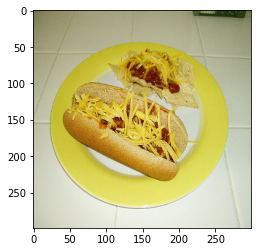

In [64]:
plt.imshow(X_train[0])

In [35]:
cnn_model=Sequential()
cnn_model.add(Conv2D(filters=6,kernel_size=(3,3),activation="relu",input_shape=(299,299,3)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(16,kernel_size=(3,3),activation="relu"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(128,activation="relu"))
cnn_model.add(Dense(128,activation="relu"))
cnn_model.add(Dense(2,activation="sigmoid"))
cnn_model.compile(loss=losses.CategoricalCrossentropy(),optimizer='adam',metrics=['accuracy'])
history_cnn=cnn_model.fit(X_train,y_train,batch_size=256,validation_data=(X_test,y_test),epochs=10,verbose=1)

Epoch 1/10


2022-10-21 13:12:57.979608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - ETA: 0s - loss: 2.3705 - accuracy: 0.4993

2022-10-21 13:13:14.950552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 19s 1s/step - loss: 2.3705 - accuracy: 0.4993 - val_loss: 0.7577 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 17s 1s/step - loss: 0.7389 - accuracy: 0.4950 - val_loss: 0.6812 - val_accuracy: 0.5575
Epoch 3/10
12/12 [==============================] - 8s 635ms/step - loss: 0.6506 - accuracy: 0.6113 - val_loss: 0.6398 - val_accuracy: 0.6429
Epoch 4/10
12/12 [==============================] - 8s 649ms/step - loss: 0.6001 - accuracy: 0.6713 - val_loss: 0.6136 - val_accuracy: 0.6724
Epoch 5/10
12/12 [==============================] - 9s 773ms/step - loss: 0.5636 - accuracy: 0.7123 - val_loss: 0.6062 - val_accuracy: 0.6894
Epoch 6/10
12/12 [==============================] - 8s 659ms/step - loss: 0.5246 - accuracy: 0.7413 - val_loss: 0.5919 - val_accuracy: 0.7096
Epoch 7/10
12/12 [==============================] - 8s 659ms/step - loss: 0.4730 - accuracy: 0.7853 - val_loss: 0.5779 - val_accuracy: 0.7236
Epoch 8/10
12/12 [===

In [28]:
X_test.shape

(644, 299, 299, 3)

In [24]:
X_train.shape

(1481, 299, 299, 3)

In [18]:
y_test.shape

(644, 2)

In [20]:
y_train.shape

(1481, 2)